In [1]:
# Math
import numpy as np
from scipy.integrate import solve_ivp
# Plotting
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
# Modules
import importlib #Reload
import Diffusion_w_Consumption

In [16]:
# Reload the module
importlib.reload(Diffusion_w_Consumption)
# Import the classes again
from Diffusion_w_Consumption import DiffusionWithConsumption1D, configure_rc_params

# Apply rcParams configuration
configure_rc_params()

# Results for different Bacterial Concentrations

In [3]:
syst_params = {
'L' : 1.0,  'T' : 1.0, # Lenght & Time Domain
'Tc': 1.0,  'Td': 1.0, # Consump & Diff times
'Nb': 1.0,             # Total Number of Bacteria
'nx': 50,   'nt': 100  # Num Spatial/Temporal points
}
L = syst_params['L']

# Initial condition for nutrients
def n0_linear(x):
    return x / L

## 1. Constant Concentration

|\Phi(x=0, t=1.0)| = 0.365844


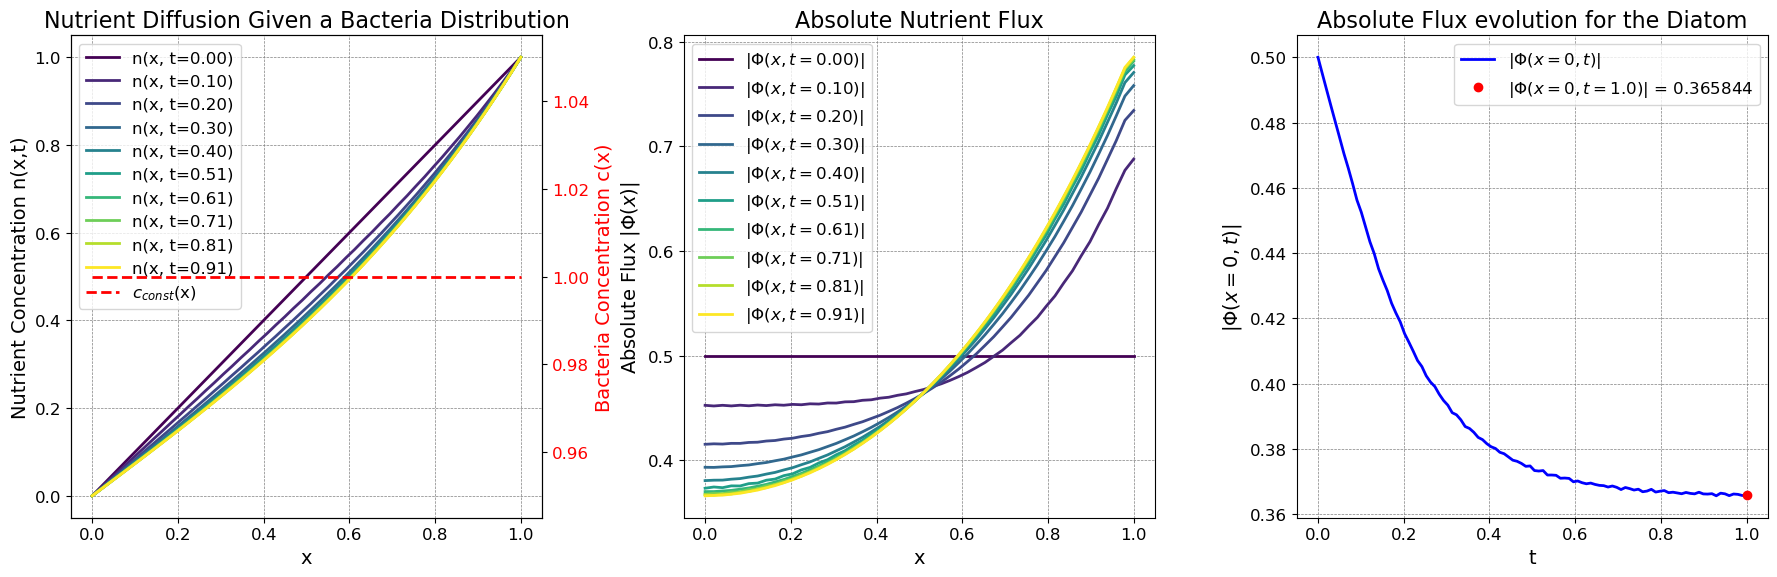

In [17]:
# Nutrient eater concentration function
def c_const(x):
    return np.ones_like(x)

# Create an instance of the class and solve the PDE
diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_const)
diffusion_system.solve_pde()
diffusion_system.plot()

## 2. Exponential Concentrations

|\Phi(x=0, t=1.0)| = 0.367503


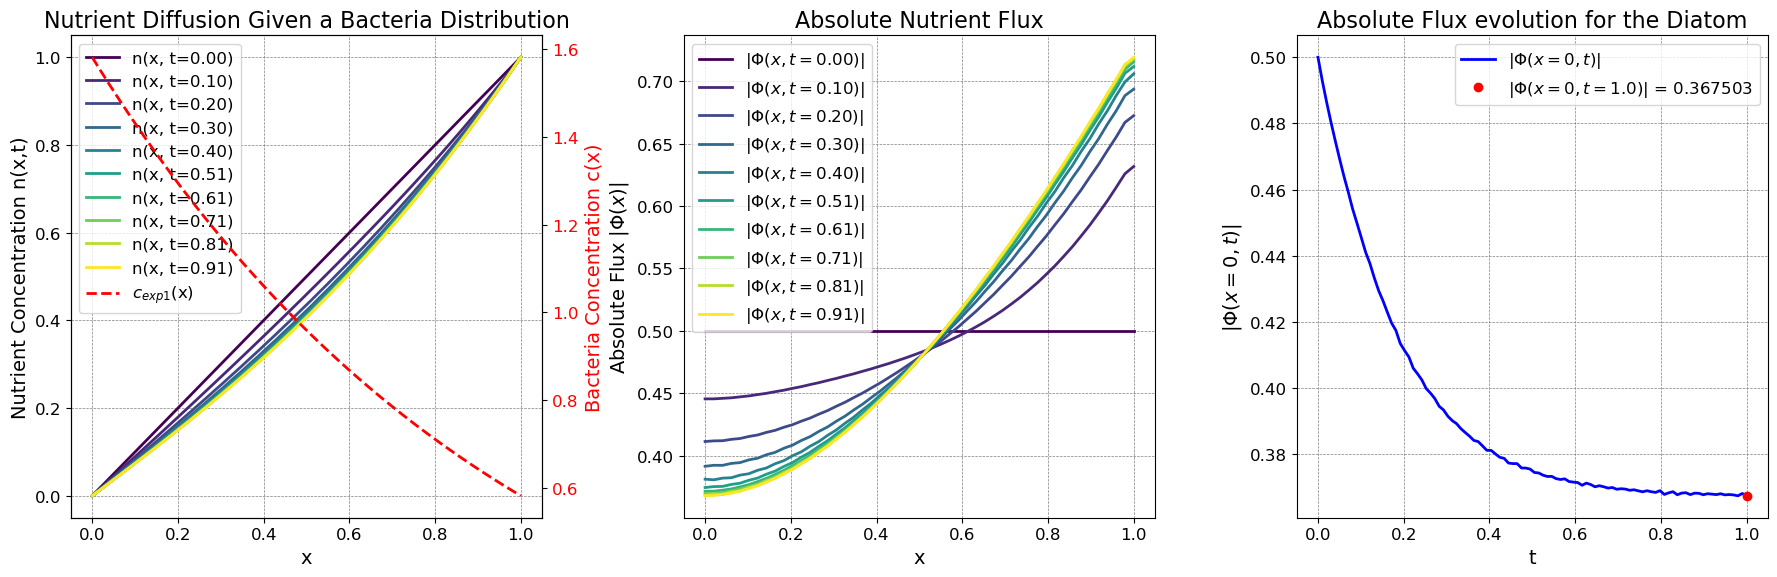

In [5]:
# Nutrient eater concentration function
def c_exp1(x):
    return np.exp(1 - x / L) / (L * (np.e - 1))

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_exp1)
diffusion_system.solve_pde()
diffusion_system.plot()

|\Phi(x=0, t=1.0)| = 0.367705


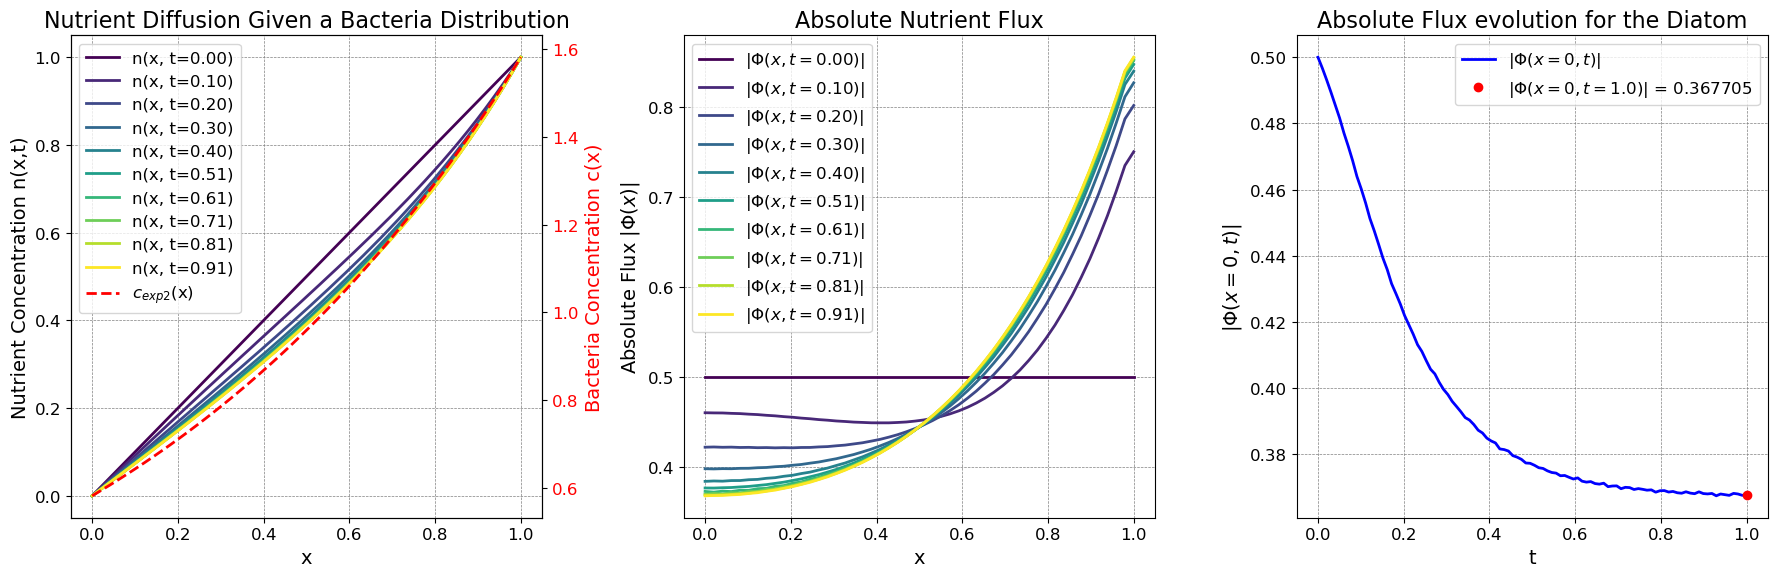

In [6]:
# Nutrient eater concentration function
def c_exp2(x):
    return np.exp(x / L) / (L * (np.e - 1))

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_exp2)
diffusion_system.solve_pde()
diffusion_system.plot()

## 3. Step Concentrations

|\Phi(x=0, t=1.0)| = 0.368156


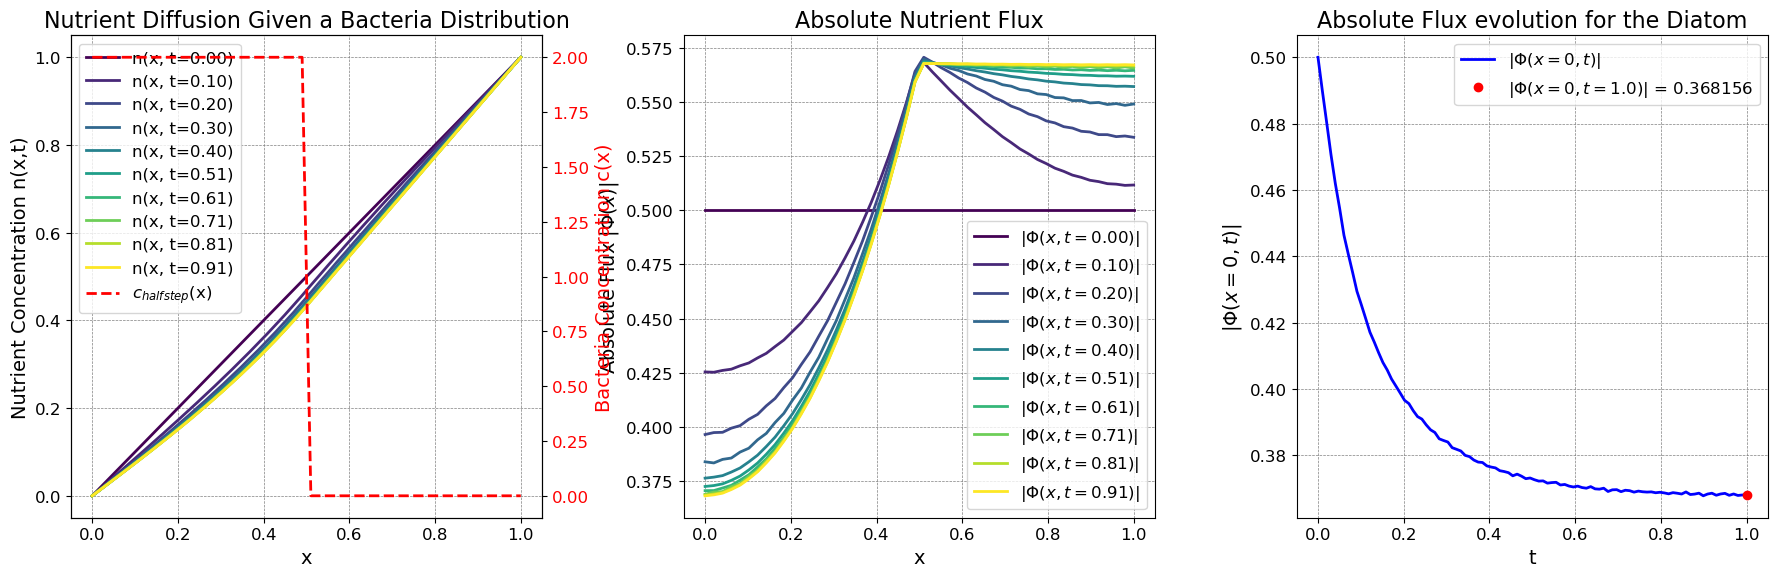

In [8]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 1 / l, 0) # 1/l if x < l, else 0

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_halfstep)
diffusion_system.solve_pde()
diffusion_system.plot()

|\Phi(x=0, t=1.0)| = 0.368866


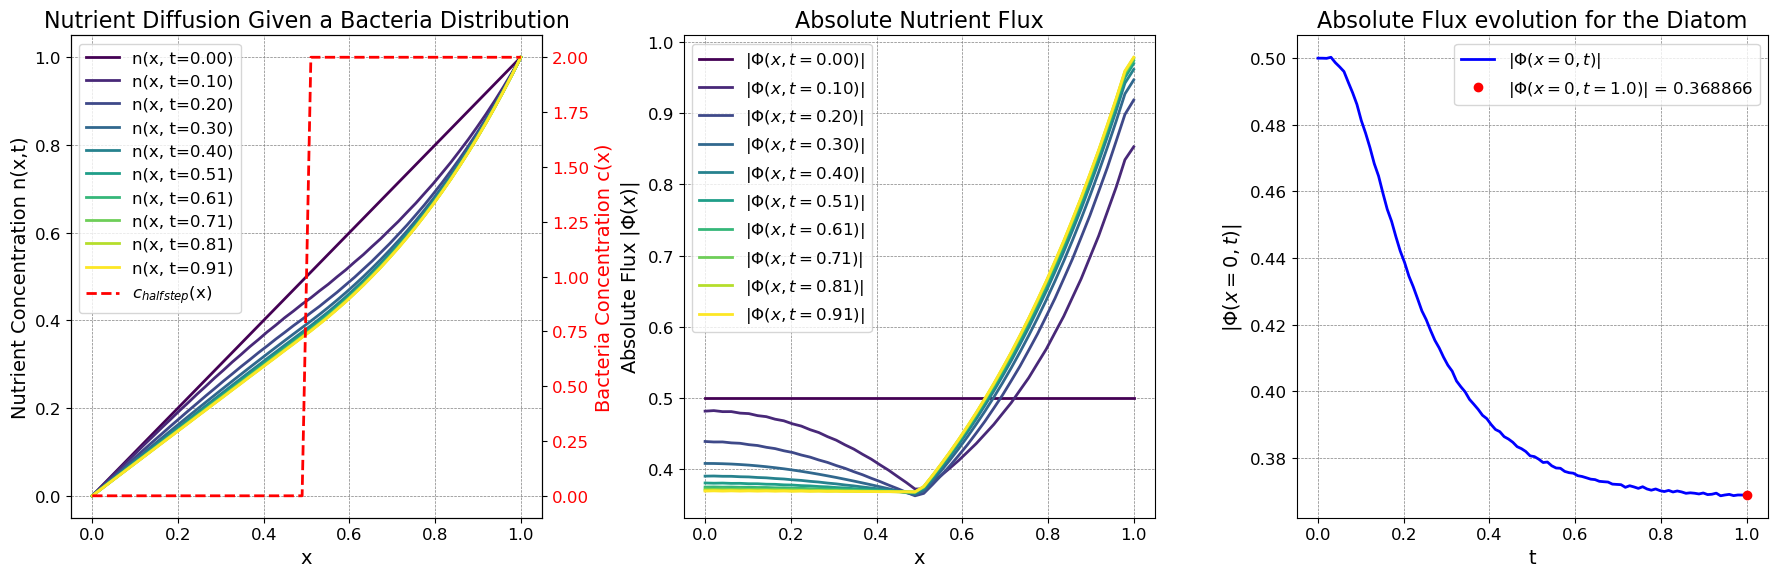

In [9]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 0, 1 / (L-l)) # 1/l if x < l, else 0

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_halfstep)
diffusion_system.solve_pde()
diffusion_system.plot()

|\Phi(x=0, t=1.0)| = 0.409326


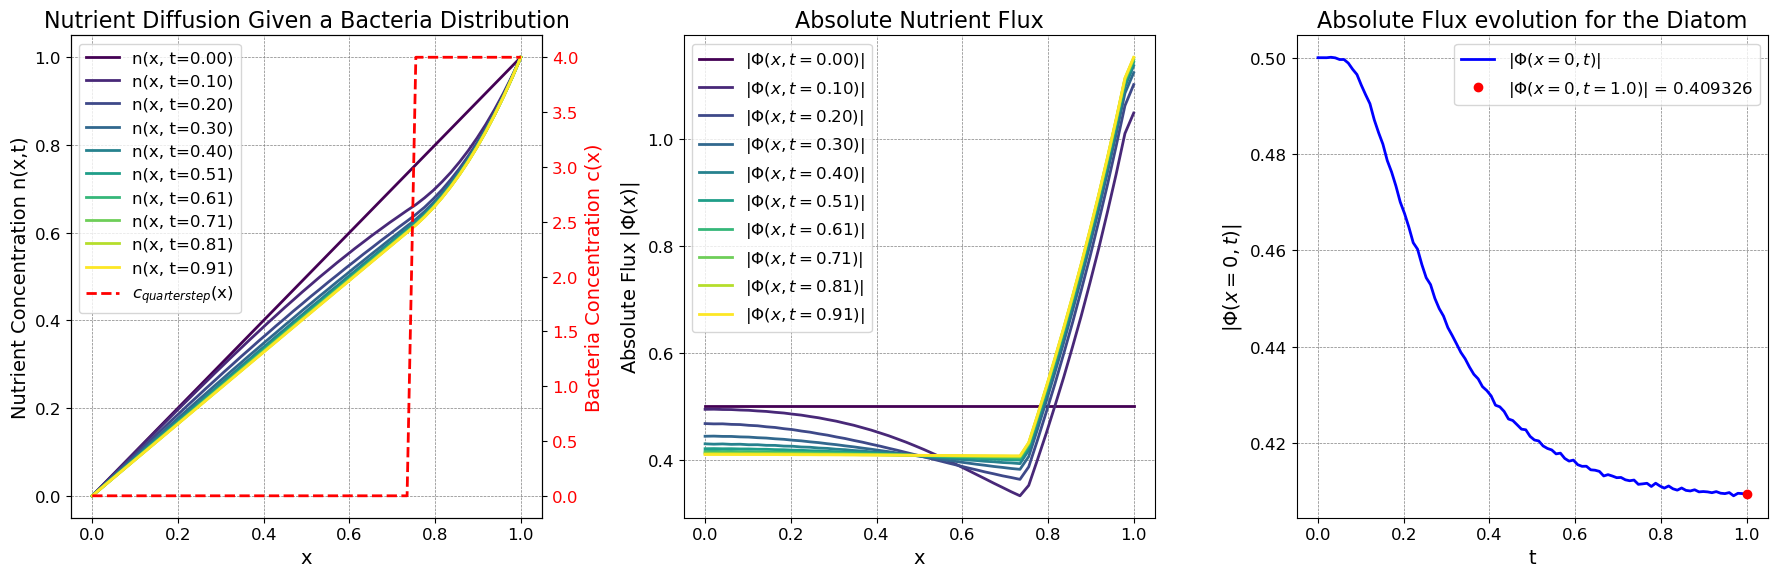

In [10]:
def c_quarterstep(x):
    l=L*3/4
    return np.where(x < l, 0, 1 / (L-l) ) # 0 if x < l, else 1/L-l

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_quarterstep)
diffusion_system.solve_pde()
diffusion_system.plot()

|\Phi(x=0, t=1.0)| = 0.334499


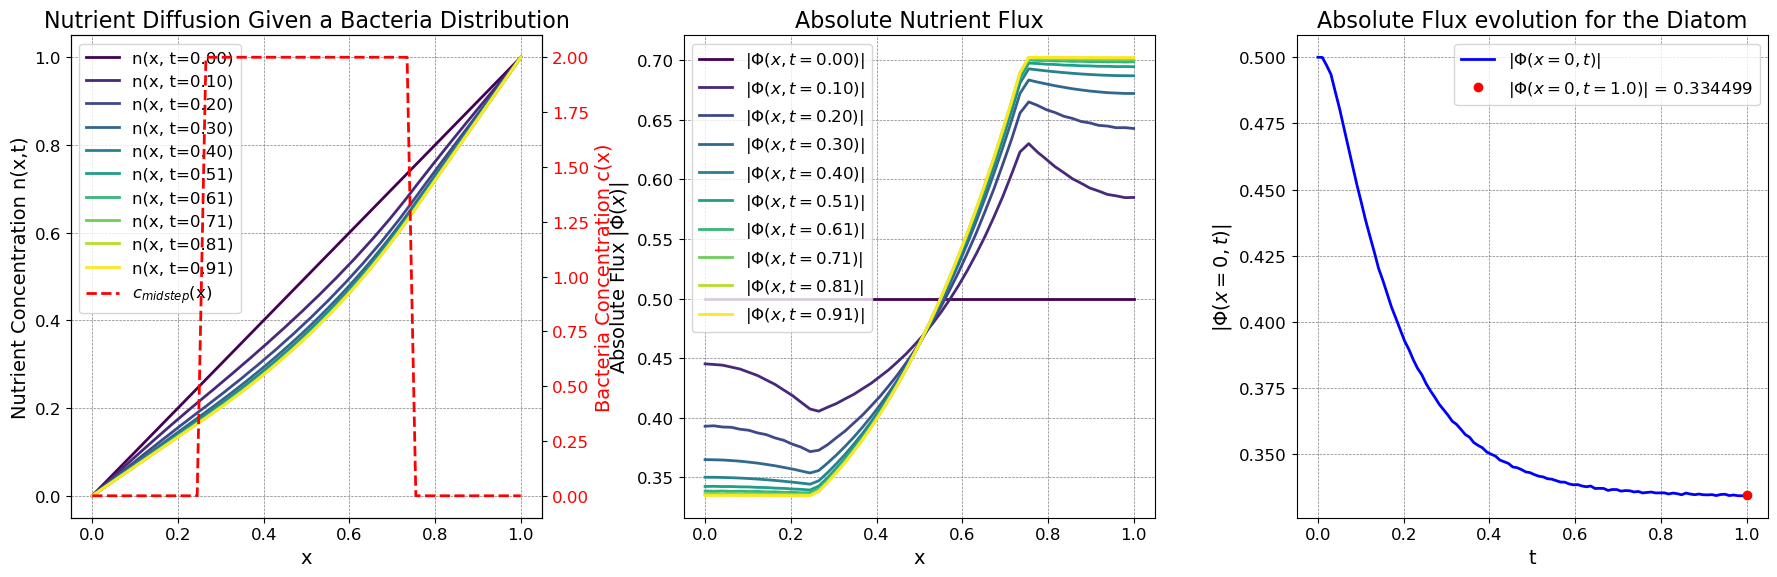

In [11]:
def c_midstep(x):
    x0 = L/4 # Starting point of the step
    l  = L/2 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_midstep)
diffusion_system.solve_pde()
diffusion_system.plot()

|\Phi(x=0, t=1.0)| = 0.331423


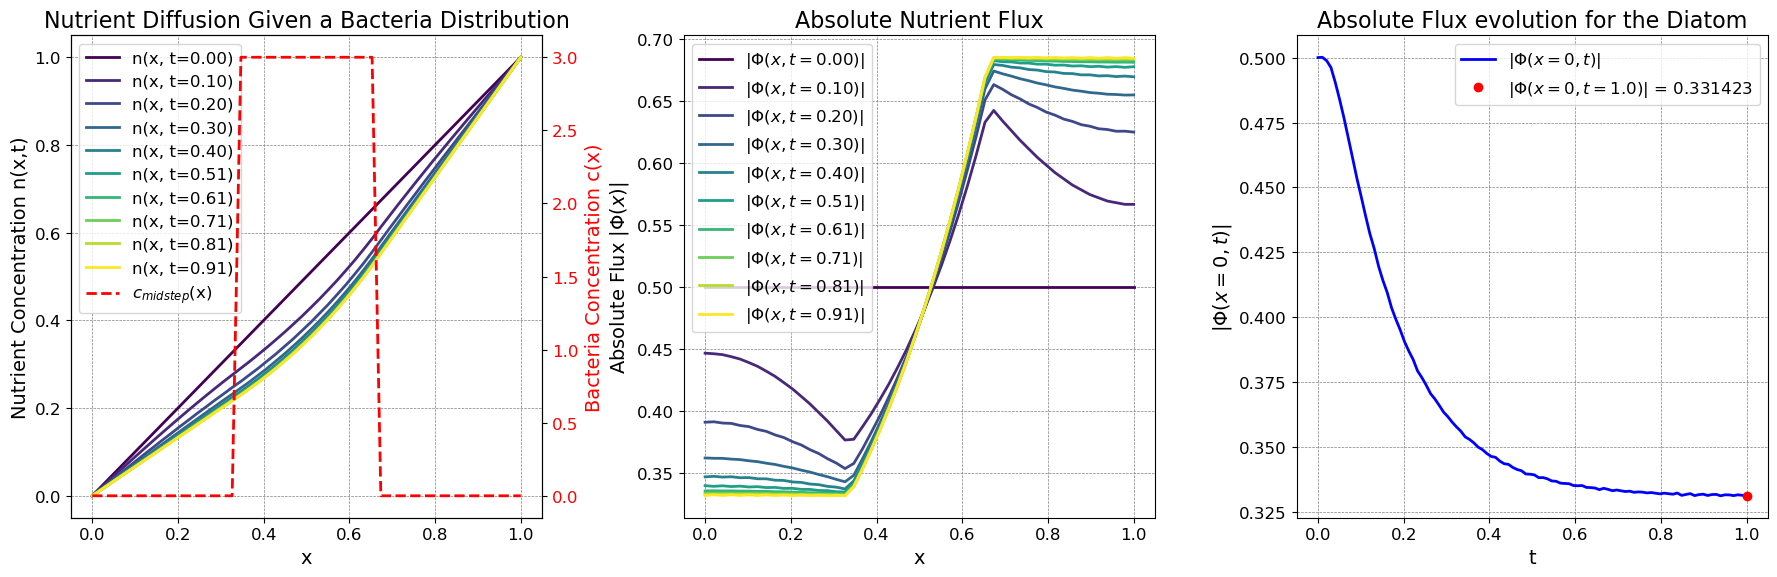

In [12]:
def c_midstep(x):
    x0 = L/3 # Starting point of the step
    l  = L/3 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear, c_midstep)
diffusion_system.solve_pde()
diffusion_system.plot()

## (Opposite Initial Condition)

|\Phi(x=0, t=1.0)| = 1.153851


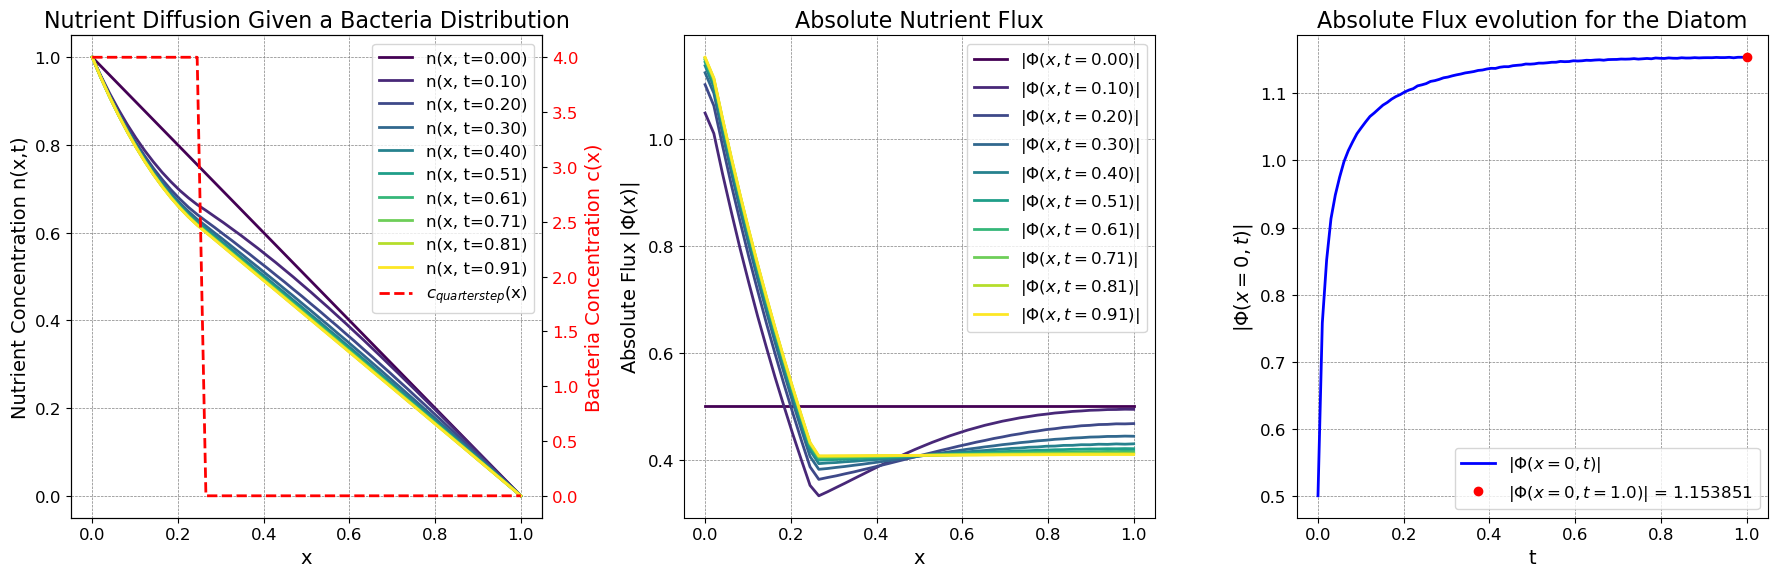

In [13]:
def n0_linear2(x): return 1 - x / L
def c_quarterstep(x):
    l=L/4
    return np.where(x < l, 1 / l, 0) # Nb/l if x < l, else 0

diffusion_system = DiffusionWithConsumption1D(syst_params, n0_linear2, c_quarterstep)
diffusion_system.solve_pde()
diffusion_system.plot()